In [1]:
# Name: Sai Anish Garapati
# UIN: 650208577

In [2]:
import os, time
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.utils import shuffle
import torchvision.transforms as transforms

# Without augmentation

In [18]:
def read_image_data(file_path, root_path, data_type):
	transform_aug = transforms.Compose([
		transforms.Resize(32),
		transforms.RandomCrop(32),
		transforms.RandomAutocontrast(p=0.4),
        transforms.RandomHorizontalFlip(p=1.0),
		transforms.Grayscale(),
		transforms.ToTensor()
	])
	transform = transforms.Compose([
		transforms.Resize(32),
		transforms.RandomCrop(32),
		transforms.ToTensor()
	])
	image_data = []
	image_labels = []
	csv_content = pd.read_csv(file_path, usecols=['ClassId', 'Path']).values
	def_imgs = []
	trans_imgs = []
	for i in range(len(csv_content)):
		img = Image.open(root_path + csv_content[i][1])
		label = csv_content[i][0]
		def_imgs.append(img)
		trans_imgs.append(transform_aug(img))
		img_array = transform(img).numpy().flatten()
		image_data.append(img_array)
		image_labels.append(label)

	return image_data, image_labels, def_imgs, trans_imgs


In [19]:
root_path = '../../../../ML_Project_Data/'
train_path = root_path + 'Train.csv'
test_path = root_path + 'Test.csv'

start_time = time.time()
train_data, train_labels, def_imgs, trans_imgs = read_image_data(train_path, root_path, 'Train')
train_data, train_labels = shuffle(train_data, train_labels, random_state=0)
test_data, test_labels, def_imgs, trans_imgs = read_image_data(test_path, root_path, 'Test')
print('Time for reading not augmented data: {}'.format(time.time() - start_time))
print(len(train_data), len(train_labels))
print(len(test_data), len(test_labels))

Time for reading not augmented data: 98.51551818847656
39209 39209
12630 12630


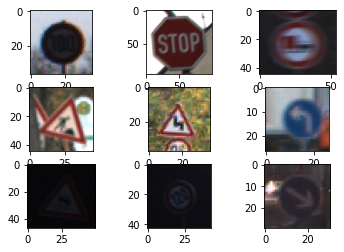

In [32]:
f, axarr = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        axarr[i, j].imshow(def_imgs[3*i + j + np.random.randint(100)])

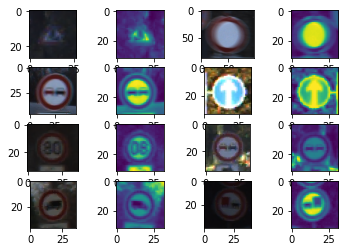

In [34]:
f, axarr = plt.subplots(4, 4)
for i in range(4):
    for j in range(0, 4, 2):
        axarr[i, j].imshow(def_imgs[3*i + j + 50])
        axarr[i, j + 1].imshow(trans_imgs[3*i + j + 50].reshape(32, 32, 1))

## SVM (Linear)

In [4]:
clf = svm.SVC(kernel='linear')

start_time = time.time()
clf.fit(train_data, train_labels)
print('Time for training: {}'.format(time.time() - start_time))

train_predict = clf.predict(train_data)
print('Train Accuracy: {}'.format(
    metrics.accuracy_score(train_predict, train_labels) * 100.0))

start_time = time.time()
test_predict = clf.predict(test_data)
print('Time for testing: {}'.format(time.time() - start_time))
print('Test Accuracy: {}'.format(
    metrics.accuracy_score(test_predict, test_labels) * 100.0))

Time for training: 556.6511178016663
Train Accuracy: 99.89288173633605
Time for testing: 325.9511013031006
Test Accuracy: 80.78384798099762


## SVM (polynomial)

In [5]:
clf2 = svm.SVC(kernel='poly', degree=4)

start_time = time.time()
clf2.fit(train_data, train_labels)
print('Time for training: {}'.format(time.time() - start_time))

train_predict = clf2.predict(train_data)
print('Train Accuracy: {}'.format(
    metrics.accuracy_score(train_predict, train_labels) * 100.0))

start_time = time.time()
test_predict = clf2.predict(test_data)
print('Time for testing: {}'.format(time.time() - start_time))
print('Test Accuracy: {}'.format(
    metrics.accuracy_score(test_predict, test_labels) * 100.0))


Time for training: 1760.4874799251556
Train Accuracy: 74.34517585248285
Time for testing: 573.1622340679169
Test Accuracy: 49.69121140142518


## SVM Linear (K-fold cross validation)

In [6]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5, random_state=1, shuffle=True)

clf = svm.SVC(kernel='linear')

start_time = time.time()
scores = []
for train_idx, test_idx in cv.split(train_data):
	X_train, X_test, Y_train, Y_test = np.array(train_data)[train_idx], np.array(
		train_data)[test_idx], np.array(train_labels)[train_idx], np.array(train_labels)[test_idx]
	clf.fit(X_train, Y_train)
	scores.append(clf.score(X_test, Y_test))
print(np.mean(scores))
print('Time for training: {}'.format(time.time() - start_time))

start_time = time.time()
test_predict = clf.predict(test_data)
print('Time for testing: {}'.format(time.time() - start_time))

print('Accuracy: {}'.format(metrics.accuracy_score(test_predict, test_labels)))


0.9437374239950931
Time for training: 2898.5596356391907
Time for testing: 280.39774537086487
Accuracy: 0.7983372921615202


## SVM Polynomial (K-fold cross validation)

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5, random_state=1, shuffle=True)

clf = svm.SVC(kernel='poly', degree=4)

start_time = time.time()
scores = []
for train_idx, test_idx in cv.split(train_data):
	X_train, X_test, Y_train, Y_test = np.array(train_data)[train_idx], np.array(
		train_data)[test_idx], np.array(train_labels)[train_idx], np.array(train_labels)[test_idx]
	clf.fit(X_train, Y_train)
	scores.append(clf.score(X_test, Y_test))
print(np.mean(scores))
print('Time for training: {}'.format(time.time() - start_time))

start_time = time.time()
test_predict = clf.predict(test_data)
print('Time for testing: {}'.format(time.time() - start_time))

print('Accuracy: {}'.format(metrics.accuracy_score(test_predict, test_labels)))


0.6151960211883767
Time for training: 5522.038682222366
Time for testing: 231.9567301273346
Accuracy: 0.46270783847980995


## Random Forest classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=0)

start_time = time.time()
clf.fit(train_data, train_labels)
print('Time for training: {}'.format(time.time() - start_time))

train_predict = clf.predict(train_data)
print('Train Accuracy: {}'.format(
    metrics.accuracy_score(train_predict, train_labels) * 100.0))

start_time = time.time()
test_predict = clf.predict(test_data)
print('Time for testing: {}'.format(time.time() - start_time))

print('Test Accuracy: {}'.format(
    metrics.accuracy_score(test_predict, test_labels) * 100.0))


Time for training: 180.77027249336243
Train Accuracy: 100.0
Time for testing: 1.015742540359497
Test Accuracy: 74.92478226444972


In [13]:
clf = RandomForestClassifier(n_estimators=300, random_state=0)

start_time = time.time()
clf.fit(train_data, train_labels)
print('Time for training: {}'.format(time.time() - start_time))

train_predict = clf.predict(train_data)
print('Train Accuracy: {}'.format(
    metrics.accuracy_score(train_predict, train_labels) * 100.0))

start_time = time.time()
test_predict = clf.predict(test_data)
print('Time for testing: {}'.format(time.time() - start_time))

print('Test Accuracy: {}'.format(
    metrics.accuracy_score(test_predict, test_labels) * 100.0))

Time for training: 500.4677393436432
Train Accuracy: 100.0
Time for testing: 2.9098756313323975
Test Accuracy: 71.63895486935867


In [15]:
clf = RandomForestClassifier(n_estimators=200, random_state=0)

start_time = time.time()
clf.fit(train_data, train_labels)
print('Time for training: {}'.format(time.time() - start_time))

train_predict = clf.predict(train_data)
print('Train Accuracy: {}'.format(
    metrics.accuracy_score(train_predict, train_labels) * 100.0))

start_time = time.time()
test_predict = clf.predict(test_data)
print('Time for testing: {}'.format(time.time() - start_time))

print('Test Accuracy: {}'.format(
    metrics.accuracy_score(test_predict, test_labels) * 100.0))

Time for training: 322.56488943099976
Train Accuracy: 100.0
Time for testing: 1.731720209121704
Test Accuracy: 71.25890736342043


# With Augmentation

In [9]:
def read_image_data(file_path, root_path, data_type):
	transform = transforms.Compose([
		transforms.Resize(32),
		transforms.RandomCrop(32),
		transforms.RandomAutocontrast(p=0.4),
        transforms.RandomHorizontalFlip(p=1.0),
		transforms.Grayscale(),
		transforms.ToTensor()
	])

	transform2 = transforms.Compose([
		transforms.Resize(32),
		transforms.RandomCrop(32),
		transforms.Grayscale(),
		transforms.ToTensor()
	])

	image_data = []
	image_labels = []
	csv_content = pd.read_csv(file_path, usecols=['ClassId', 'Path']).values
	for i in range(len(csv_content)):
		img = Image.open(root_path + csv_content[i][1])
		label = csv_content[i][0]
		if data_type == 'Train' and np.random.choice([0, 1], 1, p=[0.5, 0.5]) == 1:
		 	img_tensor = transform(img)
		 	image_data.append(img_tensor.numpy().flatten())
		 	image_labels.append(label)
		img_array = transform2(img).numpy().flatten()
		image_data.append(img_array)
		image_labels.append(label)

	return image_data, image_labels


In [10]:
root_path = '../../../../ML_Project_Data/'
train_path = root_path + 'Train.csv'
test_path = root_path + 'Test.csv'

start_time = time.time()
train_data, train_labels = read_image_data(train_path, root_path, 'Train')
train_data, train_labels = shuffle(train_data, train_labels, random_state=0)
test_data, test_labels = read_image_data(test_path, root_path, 'Test')
print('Time for reading not augmented data: {}'.format(time.time() - start_time))

print(len(train_data), len(train_labels))
print(len(test_data), len(test_labels))

Time for reading not augmented data: 53.66627097129822
58726 58726
12630 12630


## SVM(Linear)

In [11]:
clf = svm.SVC(kernel='linear')

start_time = time.time()
clf.fit(train_data, train_labels)
print('Time for training: {}'.format(time.time() - start_time))

train_predict = clf.predict(train_data)
print('Train Accuracy: {}'.format(
    metrics.accuracy_score(train_predict, train_labels) * 100.0))

start_time = time.time()
test_predict = clf.predict(test_data)
print('Time for testing: {}'.format(time.time() - start_time))

print('Test Accuracy: {}'.format(
    metrics.accuracy_score(test_predict, test_labels) * 100.0))


Time for training: 735.9279799461365
Train Accuracy: 95.40578278786228
Time for testing: 231.44842076301575
Test Accuracy: 76.73000791765638


## SVM (polynomial)

In [18]:
clf2 = svm.SVC(kernel='poly', degree=4)

start_time = time.time()
clf2.fit(train_data, train_labels)
print('Time for training: {}'.format(time.time() - start_time))

train_predict = clf2.predict(train_data)
print('Train Accuracy: {}'.format(
    metrics.accuracy_score(train_predict, train_labels) * 100.0))

start_time = time.time()
test_predict = clf2.predict(test_data)
print('Time for testing: {}'.format(time.time() - start_time))

print('Test Accuracy: {}'.format(
    metrics.accuracy_score(test_predict, test_labels) * 100.0))


Time for training: 1475.7759742736816
Train Accuracy: 73.91104451180055
Time for testing: 304.6151440143585
Test Accuracy: 47.672209026128264


## SVM (K fold cross validation)

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5, random_state=1, shuffle=True)

clf = svm.SVC(kernel='linear')

start_time = time.time()
scores = []
for train_idx, test_idx in cv.split(train_data):
	X_train, X_test, Y_train, Y_test = np.array(train_data)[train_idx], np.array(
		train_data)[test_idx], np.array(train_labels)[train_idx], np.array(train_labels)[test_idx]
	clf.fit(X_train, Y_train)
	scores.append(clf.score(X_test, Y_test))
print(np.mean(scores))
print('Time for training: {}'.format(time.time() - start_time))

start_time = time.time()
test_predict = clf.predict(test_data)
print('Time for testing: {}'.format(time.time() - start_time))

print('Accuracy: {}'.format(metrics.accuracy_score(test_predict, test_labels)))

0.8671798071236372
Time for training: 2956.665678501129
Time for testing: 174.63573503494263
Accuracy: 0.7588281868566904


## Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=0)

start_time = time.time()
clf.fit(train_data, train_labels)
print('Time for training: {}'.format(time.time() - start_time))

train_predict = clf.predict(train_data)
print('Train Accuracy: {}'.format(
    metrics.accuracy_score(train_predict, train_labels) * 100.0))

start_time = time.time()
test_predict = clf.predict(test_data)
print('Time for testing: {}'.format(time.time() - start_time))

print('Test Accuracy: {}'.format(
    metrics.accuracy_score(test_predict, test_labels) * 100.0))


Time for training: 155.21977257728577
Train Accuracy: 100.0
Time for testing: 0.9853112697601318
Test Accuracy: 70.1187648456057


In [17]:
clf = RandomForestClassifier(n_estimators=300, random_state=0)

start_time = time.time()
clf.fit(train_data, train_labels)
print('Time for training: {}'.format(time.time() - start_time))

train_predict = clf.predict(train_data)
print('Train Accuracy: {}'.format(
    metrics.accuracy_score(train_predict, train_labels) * 100.0))

start_time = time.time()
test_predict = clf.predict(test_data)
print('Time for testing: {}'.format(time.time() - start_time))

print('Test Accuracy: {}'.format(
    metrics.accuracy_score(test_predict, test_labels) * 100.0))

Time for training: 514.7585415840149
Train Accuracy: 100.0
Time for testing: 2.7575910091400146
Test Accuracy: 71.63895486935867


In [16]:
clf = RandomForestClassifier(n_estimators=200, random_state=0)

start_time = time.time()
clf.fit(train_data, train_labels)
print('Time for training: {}'.format(time.time() - start_time))

train_predict = clf.predict(train_data)
print('Train Accuracy: {}'.format(
    metrics.accuracy_score(train_predict, train_labels) * 100.0))

start_time = time.time()
test_predict = clf.predict(test_data)
print('Time for testing: {}'.format(time.time() - start_time))

print('Test Accuracy: {}'.format(
    metrics.accuracy_score(test_predict, test_labels) * 100.0))


Time for training: 343.944881439209
Train Accuracy: 100.0
Time for testing: 1.8990697860717773
Test Accuracy: 71.25890736342043
